### 한글 워드 클라우드
    - 한빛 아카데미 > 새로나온 책

In [1]:
import requests
import pandas as pd
from tqdm import tqdm
from bs4 import BeautifulSoup

In [2]:
base_url = 'https://www.hanbit.co.kr'
main_url = '/academy/books/new_book_list.html'

In [3]:
lines = []
for page in tqdm(range(1,24)):          # 총폐이지가 23페이지
    url = f'{base_url}{main_url}?page={page}'
    result = requests.get(url)
    soup = BeautifulSoup(result.text)
    lis = soup.select('li.sub_book_list')

    for li in lis:
        href = li.select_one('.pop_quick_bg')['onclick'][10:-1]
        res = requests.get(base_url + href)
        book_soup = BeautifulSoup(res.text)
        #태그정보
        tags =book_soup.select('.tag_area > a')
        for a in tags:
            lines.append(a.get_text().strip())


100%|██████████| 23/23 [05:11<00:00, 13.53s/it]


In [4]:
lines[:10]

['매트랩',
 'MATLAB',
 '매트랩 프로그래밍',
 '의학통계',
 '논문',
 '통계',
 '분석',
 '데이터분석',
 'jamovi',
 '메타분석']

In [5]:
len(lines)

2662

#### 2.워드 클라우드 만들기

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

- 태그 리스트(lines)를 frequency dictionary로 만들기

In [7]:
tag_set = set(lines) # 중복 제거
len(tag_set)

1425

In [9]:
#빈도 찾기
tag_dict ={item:lines.count(item) for item in tag_set}
#tag_dict
# for item in tag_set:
#   tag_dict[item] = lines.count(item)
#

{'': 1,
 '재귀': 2,
 '수치선형대수': 1,
 '비주얼스튜디오2012': 1,
 '기술통계': 1,
 '변압기': 1,
 'NCS': 3,
 '소프트웨어 공학': 2,
 '필터링': 1,
 'ComputationalThinking': 2,
 'C언어': 5,
 '모션': 1,
 '오피스': 3,
 '소비자 행동분석': 1,
 '조직설계': 1,
 '공학설계프로젝트': 1,
 '해석학': 3,
 '소비자행동론': 1,
 'Adobe': 1,
 '빅데이터 실습': 1,
 '수치해석학': 3,
 '전원회로': 1,
 'basic mathematics': 1,
 '형식언어': 1,
 '우분투리눅스': 1,
 '검색': 1,
 '양자이론': 1,
 '웹페이지': 1,
 'Friedberg': 1,
 '정보교육': 1,
 '워드': 4,
 '포맷스트링': 1,
 'Mathcad': 1,
 '프로젝트 관리': 1,
 '회계처리': 2,
 '기초공업수학': 2,
 '서버': 4,
 '유닉스시스템표준': 1,
 'basic mathematics 대학수학': 1,
 '디렉터리': 1,
 '미분적분학': 19,
 '마케팅': 1,
 '기본제어': 1,
 '무선통신': 1,
 '이력서작성': 1,
 'Security': 1,
 'LTE': 2,
 'IMC': 1,
 '금융': 1,
 '신호 처리': 1,
 '디지털실험': 1,
 'EV': 1,
 '디지털 트렌드': 1,
 'SW교육': 2,
 'Calculus': 1,
 '컴퓨터 비전': 1,
 '디지털콘텐츠': 1,
 '스케줄링': 1,
 'Mathematica': 1,
 '무역경영사': 59,
 '제어기설계': 1,
 '멀티미디어개론': 1,
 '발표': 1,
 '소비자행동': 2,
 '전자기학': 5,
 '알트슐러': 1,
 'HRM': 1,
 'multimedia': 1,
 '지도학습': 1,
 '공학 기초수학': 1,
 '통신이론': 3,
 '레이어': 1,
 '파일입출력': 1,
 '경제학원론': 2,
 '

In [10]:
# 딕셔너리 형태로 만들어줌
count = 0
for key,val in tag_dict.items():
    print(key,':',val)
    count +=1
    if count >5:
        break

 : 1
재귀 : 2
수치선형대수 : 1
비주얼스튜디오2012 : 1
기술통계 : 1
변압기 : 1


- 워드 클라우드

In [13]:
wc =WordCloud(
    background_color='white',random_state=2023
)
wc = wc.generate_from_frequencies(tag_dict)

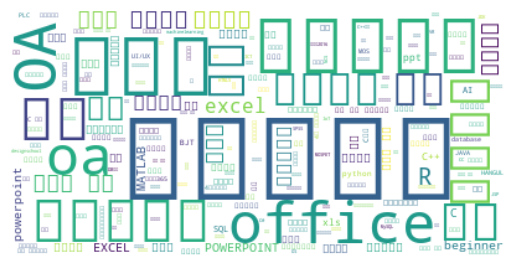

In [14]:
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

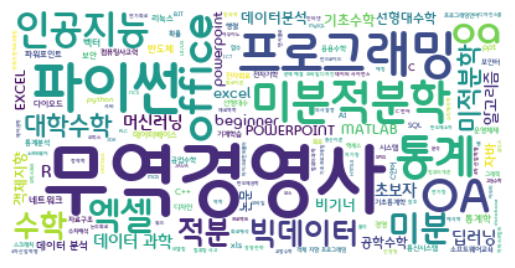

In [17]:
wc =WordCloud(
    background_color='white',random_state=2023,
    font_path='c:/Windows/Fonts/MalangmalangB.ttf'
).generate_from_frequencies(tag_dict)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

- 태그 단어를 리스트를 펼쳐서 문자열로 만든 후 워드 클라우드 만들기

In [18]:
tag_text = ' '.join(lines)
print(tag_text[:100])

매트랩 MATLAB 매트랩 프로그래밍 의학통계 논문 통계 분석 데이터분석 jamovi 메타분석 패널데이터 의사 의학 보건 정보 교육 교과교육론 정보교과교육 SW교육 IT교육 회로 


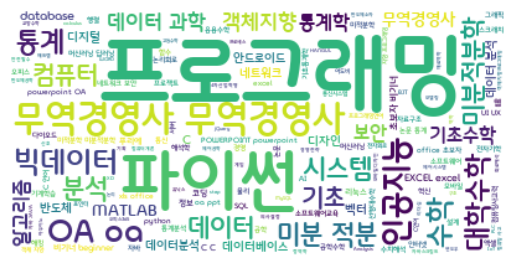

In [19]:
wc =WordCloud(
    background_color='white',random_state=2023,
    font_path='c:/Windows/Fonts/MalangmalangB.ttf'
).generate(tag_text)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()